In [102]:
import torch
import torchvision
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import TensorDataset,Dataset,DataLoader


In [103]:
device='mps' if torch.backends.mps.is_available() else 'cpu'

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
x_train = torch.tensor([[[[1,2,3,4],[2,3,4,5],
                          [5,6,7,8],[1,3,4,5]]],
                        [[[-1,2,3,-4],[2,-3,4,5],
            [-5,6,-7,8],[-1,-3,-4,-5]]]]).to(device).float()


In [106]:
x_train=x_train/8

In [107]:
y_train=torch.tensor([0,1]).to(device).float()

In [108]:
x_train.shape


torch.Size([2, 1, 4, 4])

In [109]:
def get_model():
    model=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,padding=1,stride=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,padding=1,stride=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1,1),
    ).to(device)

    loss_fn=nn.BCEWithLogitsLoss()
    optimizer=torch.optim.Adam(params=model.parameters(),lr=1e-2)
    return model,loss_fn,optimizer



In [110]:
!pip install torch_summary


In [111]:
from torchsummary import summary

In [112]:
model,loss_fn,optimizer=get_model()
summary(model)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            10
├─MaxPool2d: 1-2                         --
├─ReLU: 1-3                              --
├─Conv2d: 1-4                            10
├─MaxPool2d: 1-5                         --
├─ReLU: 1-6                              --
├─Flatten: 1-7                           --
├─Linear: 1-8                            2
Total params: 22
Trainable params: 22
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            10
├─MaxPool2d: 1-2                         --
├─ReLU: 1-3                              --
├─Conv2d: 1-4                            10
├─MaxPool2d: 1-5                         --
├─ReLU: 1-6                              --
├─Flatten: 1-7                           --
├─Linear: 1-8                            2
Total params: 22
Trainable params: 22
Non-trainable params: 0

In [113]:
def train_batch(x,y,model,los_fn,optimizer):
    model.train()
    y_pred=model(x)
    loss=loss_fn(y_pred,y.unsqueeze(0))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item()

In [114]:
trn_dl=DataLoader(TensorDataset(x_train,y_train))

In [115]:
from tqdm.auto import tqdm
l=[]
for epoch in tqdm(range(2000)):
    for ix,batch in enumerate(iter(trn_dl)):
        x,y=batch
        batch_loss=train_batch(x,y,model,loss_fn,optimizer)
        print(batch_loss)
        l.append(batch_loss)

  0%|          | 0/2000 [00:00<?, ?it/s]

1.1007035970687866
0.4015827178955078
1.0628471374511719
0.41058892011642456
1.041561484336853
0.41691020131111145
1.0248031616210938
0.42161792516708374
1.0119140148162842
0.42524558305740356
0.9981633424758911
0.4287216067314148
0.9923601746559143
0.431043416261673
0.9849169254302979
0.43222469091415405
0.9766788482666016
0.4324709475040436
0.968351423740387
0.43239304423332214
0.9597949385643005
0.4315549433231354
0.9492336511611938
0.42966148257255554
0.9403222799301147
0.42744073271751404
0.9357032775878906
0.4246439039707184
0.9296497106552124
0.4213973879814148
0.9221490621566772
0.4177528917789459
0.9155013561248779
0.4126245677471161
0.9123502969741821
0.4053415358066559
0.9092077016830444
0.395638644695282
0.9060612320899963
0.3838917911052704
0.9038732051849365
0.37184208631515503
0.9002992510795593
0.3608330488204956
0.8964697122573853
0.3490827977657318
0.8931885957717896
0.3351967930793762
0.8898515105247498
0.3194091022014618
0.886447548866272
0.30196139216423035
0.88643

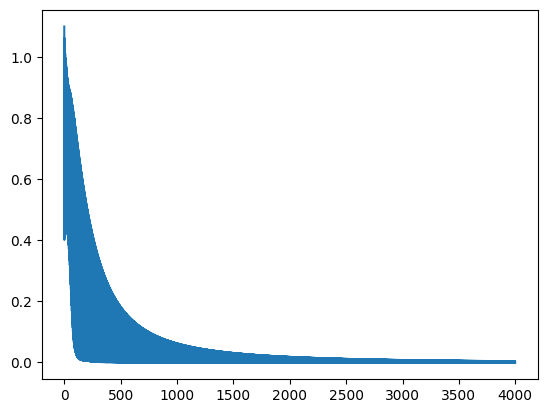

In [116]:
plt.plot(l)